In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
NUM_WORDS = 10000
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words = NUM_WORDS)
def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)


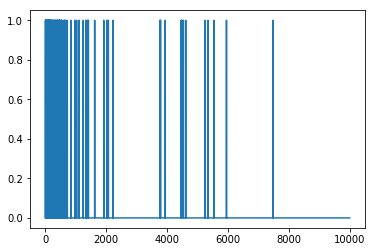

In [4]:
plt.plot(train_data[0])

In [5]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [8]:
baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 5s - loss: 0.4742 - acc: 0.8144 - binary_crossentropy: 0.4742 - val_loss: 0.3254 - val_acc: 0.8771 - val_binary_crossentropy: 0.3254
Epoch 2/20
 - 4s - loss: 0.2413 - acc: 0.9130 - binary_crossentropy: 0.2413 - val_loss: 0.2839 - val_acc: 0.8885 - val_binary_crossentropy: 0.2839
Epoch 3/20
 - 4s - loss: 0.1777 - acc: 0.9376 - binary_crossentropy: 0.1777 - val_loss: 0.2945 - val_acc: 0.8834 - val_binary_crossentropy: 0.2945
Epoch 4/20
 - 4s - loss: 0.1440 - acc: 0.9502 - binary_crossentropy: 0.1440 - val_loss: 0.3306 - val_acc: 0.8730 - val_binary_crossentropy: 0.3306
Epoch 5/20
 - 4s - loss: 0.1168 - acc: 0.9613 - binary_crossentropy: 0.1168 - val_loss: 0.3426 - val_acc: 0.8747 - val_binary_crossentropy: 0.3426
Epoch 6/20
 - 4s - loss: 0.0928 - acc: 0.9722 - binary_crossentropy: 0.0928 - val_loss: 0.3739 - val_acc: 0.8706 - val_binary_crossentropy: 0.3739
Epoch 7/20
 - 4s - l

In [9]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])
smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [10]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs = 20,
                                    batch_size = 52,
                                    validation_data = (test_data, test_labels),
                                    verbose = 2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.5159 - acc: 0.7872 - binary_crossentropy: 0.5159 - val_loss: 0.4193 - val_acc: 0.8834 - val_binary_crossentropy: 0.4193
Epoch 2/20
 - 4s - loss: 0.3346 - acc: 0.9196 - binary_crossentropy: 0.3346 - val_loss: 0.3711 - val_acc: 0.8810 - val_binary_crossentropy: 0.3711
Epoch 3/20
 - 4s - loss: 0.2448 - acc: 0.9472 - binary_crossentropy: 0.2448 - val_loss: 0.3650 - val_acc: 0.8736 - val_binary_crossentropy: 0.3650
Epoch 4/20
 - 4s - loss: 0.1851 - acc: 0.9630 - binary_crossentropy: 0.1851 - val_loss: 0.3842 - val_acc: 0.8705 - val_binary_crossentropy: 0.3842
Epoch 5/20
 - 4s - loss: 0.1407 - acc: 0.9746 - binary_crossentropy: 0.1407 - val_loss: 0.4397 - val_acc: 0.8697 - val_binary_crossentropy: 0.4397
Epoch 6/20
 - 4s - loss: 0.1115 - acc: 0.9806 - binary_crossentropy: 0.1115 - val_loss: 0.4833 - val_acc: 0.8651 - val_binary_crossentropy: 0.4833
Epoch 7/20
 - 4s - loss: 0.0903 - acc: 0.9847 - binary_crossentropy:

In [11]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer = 'adam',
                    loss= 'binary_crossentropy',
                    metrics = ['accuracy', 'binary_crossentropy'])
bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [12]:
bigger_history = bigger_model.fit(train_data,
                                 train_labels,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data = (test_data, test_labels),
                                 verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 18s - loss: 0.3454 - acc: 0.8527 - binary_crossentropy: 0.3454 - val_loss: 0.3057 - val_acc: 0.8724 - val_binary_crossentropy: 0.3057
Epoch 2/20
 - 19s - loss: 0.1472 - acc: 0.9463 - binary_crossentropy: 0.1472 - val_loss: 0.3336 - val_acc: 0.8716 - val_binary_crossentropy: 0.3336
Epoch 3/20
 - 18s - loss: 0.0507 - acc: 0.9853 - binary_crossentropy: 0.0507 - val_loss: 0.4480 - val_acc: 0.8671 - val_binary_crossentropy: 0.4480
Epoch 4/20
 - 18s - loss: 0.0078 - acc: 0.9987 - binary_crossentropy: 0.0078 - val_loss: 0.6114 - val_acc: 0.8639 - val_binary_crossentropy: 0.6114
Epoch 5/20
 - 18s - loss: 0.0011 - acc: 1.0000 - binary_crossentropy: 0.0011 - val_loss: 0.6740 - val_acc: 0.8680 - val_binary_crossentropy: 0.6740
Epoch 6/20
 - 18s - loss: 2.5761e-04 - acc: 1.0000 - binary_crossentropy: 2.5761e-04 - val_loss: 0.7193 - val_acc: 0.8683 - val_binary_crossentropy: 0.7193
Epoch 7/20
 - 18s - loss: 1.4066e-04 - acc: 1.0000 - b

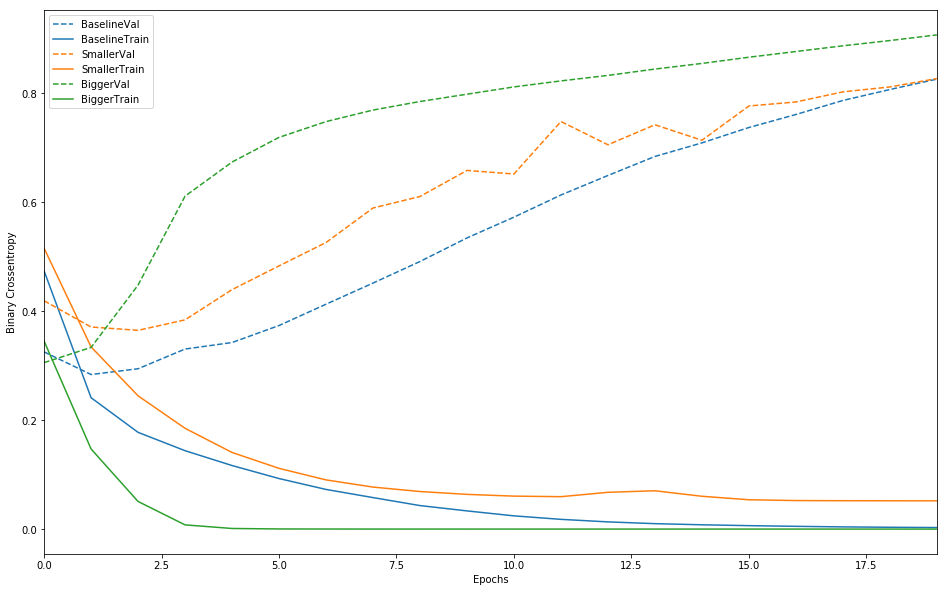

In [13]:
def plot_history(histories, key = 'binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                      '--', label=name.title()+ 'Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                label=name.title()+ 'Train')
        
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()
    
    plt.xlim([0, max(history.epoch)])
plot_history([('baseline', baseline_history),
             ('smaller', smaller_history),
             ('bigger', bigger_history)])

In [14]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
    ])
l2_model.compile(optimizer='adam', 
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])
l2_model_history = l2_model.fit(train_data, train_labels,
                               epochs = 20,
                               batch_size = 512,
                               validation_data = (test_data, test_labels),
                               verbose = 2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.5098 - acc: 0.8080 - binary_crossentropy: 0.4684 - val_loss: 0.3727 - val_acc: 0.8788 - val_binary_crossentropy: 0.3299
Epoch 2/20
 - 4s - loss: 0.2978 - acc: 0.9114 - binary_crossentropy: 0.2512 - val_loss: 0.3360 - val_acc: 0.8871 - val_binary_crossentropy: 0.2865
Epoch 3/20
 - 4s - loss: 0.2486 - acc: 0.9313 - binary_crossentropy: 0.1968 - val_loss: 0.3380 - val_acc: 0.8852 - val_binary_crossentropy: 0.2846
Epoch 4/20
 - 4s - loss: 0.2272 - acc: 0.9413 - binary_crossentropy: 0.1721 - val_loss: 0.3547 - val_acc: 0.8796 - val_binary_crossentropy: 0.2983
Epoch 5/20
 - 4s - loss: 0.2123 - acc: 0.9479 - binary_crossentropy: 0.1549 - val_loss: 0.3655 - val_acc: 0.8773 - val_binary_crossentropy: 0.3071
Epoch 6/20
 - 4s - loss: 0.2013 - acc: 0.9532 - binary_crossentropy: 0.1420 - val_loss: 0.3770 - val_acc: 0.8755 - val_binary_crossentropy: 0.3172
Epoch 7/20
 - 4s - loss: 0.1945 - acc: 0.9558 - binary_crossentropy:

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.6215 - acc: 0.6486 - binary_crossentropy: 0.6215 - val_loss: 0.4606 - val_acc: 0.8500 - val_binary_crossentropy: 0.4606
Epoch 2/20
 - 4s - loss: 0.4429 - acc: 0.8181 - binary_crossentropy: 0.4429 - val_loss: 0.3221 - val_acc: 0.8825 - val_binary_crossentropy: 0.3221
Epoch 3/20
 - 4s - loss: 0.3409 - acc: 0.8725 - binary_crossentropy: 0.3409 - val_loss: 0.2916 - val_acc: 0.8826 - val_binary_crossentropy: 0.2916
Epoch 4/20
 - 4s - loss: 0.2815 - acc: 0.8995 - binary_crossentropy: 0.2815 - val_loss: 0.2747 - val_acc: 0.8869 - val_binary_crossentropy: 0.2747
Epoch 5/20
 - 5s - loss: 0.2400 - acc: 0.9154 - binary_crossentropy: 0.2400 - val_loss: 0.2749 - val_acc: 0.8876 - val_binary_crossentropy: 0.2749
Epoch 6/20
 - 4s - loss: 0.2143 - acc: 0.9232 - binary_crossentropy: 0.2143 - val_loss: 0.2854 - val

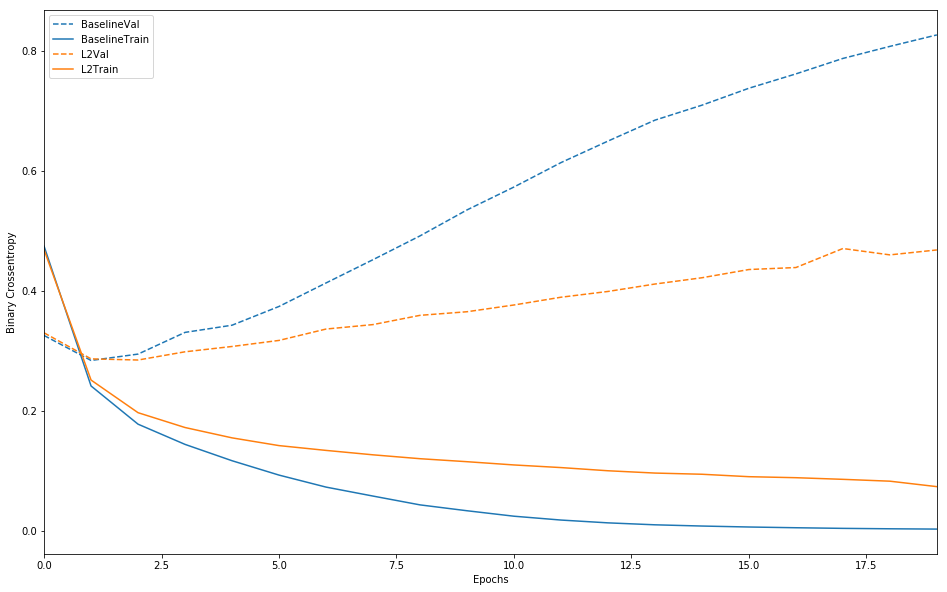

In [15]:
plot_history([('baseline', baseline_history),
             ('l2', l2_model_history)])

dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation = tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                 epochs = 20,
                                 batch_size=512,
                                 validation_data=(test_data, test_labels),
                                 verbose=2)

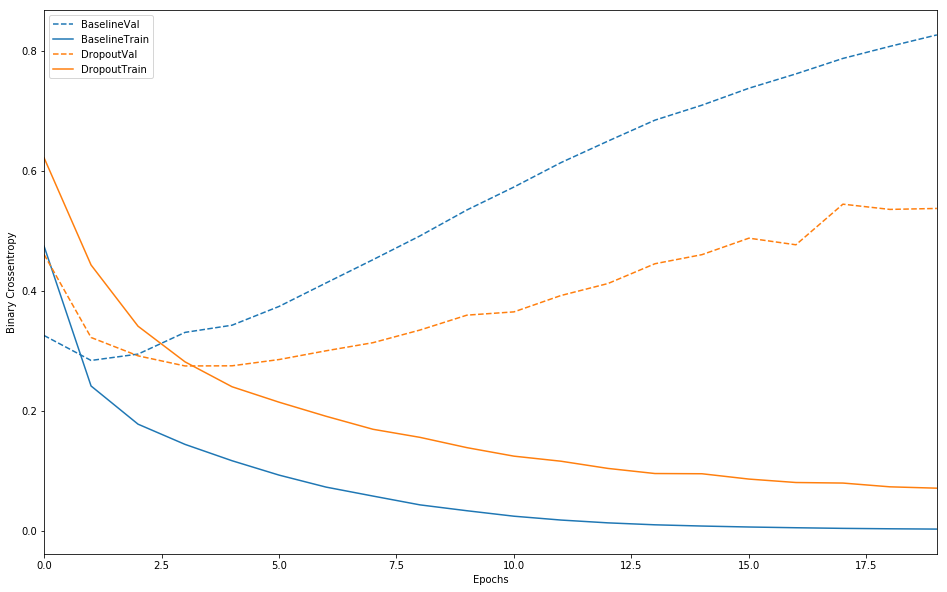

In [16]:
plot_history([('baseline', baseline_history),
             ('dropout', dpt_model_history)])